In [1]:
# importing necessary tools
import os## accessing directory structure
import time #Python time module allows to work with time in Python. It allows functionality like getting the current time, pausing the Program from executing, etc. So before starting with this module we need to import it
import numpy as np

import torch #PyTorch is a Python package that provides two high-level features: Tensor computation (like NumPy) with strong GPU acceleration. Deep neural networks built on a tape-based autograd system.
import torch.nn as nn 
#The torch. nn import gives us access to some helpful neural network things, such as various neural network layer types (things like regular fully-connected layers, convolutional layers (for imagery), recurrent layers...etc).
import torch.nn.functional as F#Applies a 1D transposed convolution operator over an input signal composed of several input planes, sometimes also called "deconvolution". conv_transpose2d.

from torchvision import datasets # torchvision is used for image processing
from torch.utils.data import DataLoader## to read API data
import torchvision.transforms as transforms # Trasforms is used to move one format to another
from torch import optim ## adam optimizer
from torchvision.transforms.functional import to_pil_image
#PIL is the Python Imaging Library which provides the python interpreter with image editing capabilities.
#pil_to_tensor #Convert a PIL Image to a tensor of the same type. This function does not support torchscript.


import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# GAN is used forimage enhencement, restore the image, increment or decrement the images
# deffusion:High Fidelity Image Generation Using Diffusion Models.
#Stable Diffusion is a latent text-to-image diffusion model capable of generating photo-realistic images given any text input

In [2]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
#CUDA (or Compute Unified Device Architecture) is a parallel computing platform and application programming interface (API) 
#that allows software to use certain types of graphics processing units (GPUs) for general purpose processing,
#an approach called general-purpose computing on GPUs (GPGPU).

#cuda. is_available. Returns a bool indicating if CUDA is currently available.

In [3]:
device

device(type='cuda')

In [4]:
#os.makedirs('../working/Datasets/')

In [5]:
dataPath = "../working/Datasets/"
os.makedirs(dataPath, exist_ok = True)

In [6]:
#from keras.datasets import mnist
#x,y = mnist.load_data()

In [7]:
trainDatasets = datasets.MNIST(dataPath,
                              train = True,
                              download = True,
                              transform = transforms.Compose([transforms.ToTensor(),  # composed used for marging
                                           transforms.Normalize([0.5],[0.5])])) # value of mean and std

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../working/Datasets/MNIST/raw/train-images-idx3-ubyte.gz to ../working/Datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../working/Datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ../working/Datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../working/Datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ../working/Datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../working/Datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../working/Datasets/MNIST/raw



In [8]:

# Image transformation is a process to change the original values of image pixels to a set of new values. 
# One type of transformation that we do on images is to transform an image into a PyTorch tensor.
# When an image is transformed into a PyTorch tensor, the pixel values are scaled between 0.0 and 1.0.
# In PyTorch, this transformation can be done using torchvision.transforms.ToTensor(). 
# It converts the PIL image with a pixel range of [0, 255] to a PyTorch FloatTensor of shape (C, H, W)
# with a range [0.0, 1.0]. 

In [9]:
trainDatasets[0]
##(0 index) because of normalization negetive value can come (*[0][1]/[10][1]/[1000][1])

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

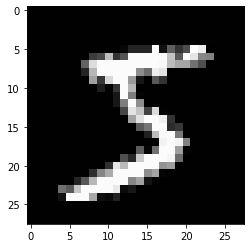

In [10]:
imageData, labelData = trainDatasets[0] # [10]/ [1000]
plt.imshow(to_pil_image(imageData), cmap="gray")
plt.show()

In [11]:
# def visualization():
#     for i in range(np.random.randint(1,30000,10)):
#         imageData, labelData = trainDatasets[0] # [10]/ [1000]
#         plt.imshow(to_pil_image(imageData), cmap="gray")
#         plt.show()
        

In [12]:
# randint=The randint() method returns an integer number selected element from the specified range.
# randn =randn() function in Python is used to return random values from the normal distribution in a specified shape. 
#         This function creates an array of the given shape and it fills with random samples from the normal standard distribution.
#         (it will return positive or negetive value)

In [13]:
trainDataLoader = DataLoader(trainDatasets, 
                             batch_size =64, 
                             shuffle =True)

In [14]:
for x,y in trainDataLoader:
    print("X Data shape is :{} and Y Data shapebis {}". format(x.shape, y.shape))
    break

X Data shape is :torch.Size([64, 1, 28, 28]) and Y Data shapebis torch.Size([64])


In [15]:
len(trainDatasets[0])

2

In [16]:
# np.prod([28,28]) # can be int or float
# int(np.prod([28,28])) # alwasys will be int
# int(np.prod([28,28,3]))

In [17]:
nn.Linear(1025,int(np.prod([28,28,1])))

Linear(in_features=1025, out_features=784, bias=True)

In [18]:
class Generator(nn.Module):  #This line class Generator(nn.Module):. simple means the Generator class will inherit the nn.Module class, it is not an argument.
    def __init__(self,parameter):
        # parent Class
        super().__init__() # The super() function is used to give access to methods and properties of a parent or sibling class. The super() function returns an object that represents the parent class.
        self.noise = parameter['noise']#Image noise is random variation of brightness or color information in images, and is usually an aspect of electronic noise. We can add noise to the image using noise() function. noise function can be useful when applied before a blur operation to defuse an image.
        self.image_size =  parameter ['image_size']
        
        self.model = nn.Sequential(
            *self.fc_layers(self.noise, 128, normalize = False),# (any number can be taken)
            *self.fc_layers(128,256), # it will go from 128 to 256 as referance as to keep
            *self.fc_layers(512,1024),
            nn.Linear(1024, int(np.prod(self.image_size))),# for continuation of data workflow and it will support activition work# np,prod =Return the product of array elements over a given axis              
            nn.Tanh() # conversion will happen from -1 to +1
         )
        def forward (self, z):
            image =self. model(z)
            image = image.view(image.size(0), * self.image_size) # stride [i](*= multiples items can be added in reference of image_size)(** also can be used here to add more parameter)                                                                                                                       
            return image
        
        
        def fc_layers(self, in_channel, out_channel, normalize = True):
            layers = []
            layers.append(nn.Linear(in_channel, out_channel))
            
            if normalize:
                layers.append(nn.BatchNorm1d(out_channel, 0.8))
                
                
            layers.append(nn.LeakyRelu(0.2))
            return layers

In [19]:
class Generator(nn.Module):
    def __init__(self, parameter):
        #Parent Class
        super().__init__()
        self.noise = parameter['noise']
        self.image_size = parameter['image_size']
        
        
        self.model =  nn.Sequential(
            *self.fc_layers(self.noise, 128, normalize = False),
            *self.fc_layers(128, 256),
            *self.fc_layers(256, 512), 
            *self.fc_layers(512, 1024),
            nn.Linear(1024, int(np.prod(self.image_size))),
            nn.Tanh()
        )
        
    def forward(self, z):
        image = self.model(z)
        image = image.view(image.size(0), *self.image_size)
        return image
    
    
    def fc_layers(self, in_channel,out_channel, normalize = True):
        layers = []
        layers.append(nn.Linear(in_channel, out_channel))
        
        if normalize:
            layers.append(nn.BatchNorm1d(out_channel, 0.8))
            
        layers.append(nn.LeakyReLU(0.2))
        return layers
        

In [20]:
# Fully Connected (FC) The fully connected layer (FC)operates on a flattened input where each input is connected to all neurons. If present,
# FC layers are usually found towards the end of CNN architectures and can be used to optimize objectives such as class scores.


# Image noise is random variation of brightness or color information in images, and is usually an aspect of electronic noise.
# We can add noise to the image using noise() function.
# noise function can be useful when applied before a blur operation to defuse an image.

# The python __init__ method is declared within a class and is used to initialize the attributes of an object as soon as the object is formed.
# While giving the definition for an __init__(self) method, a default parameter, named ‘self’ is always passed in its argument.
# This self represents the object of the class itself.
# Like in any other method of a class, in case of __init__ also ‘self’ is used as a dummy object variable for assigning values
# to the data members of an object.The __init__ method is often referred to as double underscores init or dunder init for it has 
# two underscores on each side of its name.
# These double underscores on both the sides of init imply that the method is invoked and used internally in Python, 
# without being required to be called explicitly by the object. 

In [21]:
params = {'noise':100,
        "image_size": (1,28,28)}

In [22]:
x = torch.randn(16,100).to(device) # (16= noise value)some negetive value will put to reduce the image value or make blurry image

In [23]:
print(x)

tensor([[-0.3876, -0.6046, -0.9876,  ...,  1.4582, -0.9319, -1.2055],
        [-0.3253, -0.2692, -3.1337,  ..., -0.1190,  1.9905,  1.4882],
        [ 0.6193,  0.1597, -0.7892,  ...,  0.2708,  0.3876, -2.7297],
        ...,
        [ 0.4952, -0.4219,  0.3398,  ..., -0.8510,  0.6911, -0.3418],
        [ 0.3117,  0.8186,  2.1902,  ...,  0.1927,  2.0736, -0.2263],
        [-0.6456,  1.7601, -0.4769,  ...,  0.3116,  0.0651,  1.2446]],
       device='cuda:0')


In [24]:
model_generator = Generator(params).to(device)

In [25]:
model_generator_output = model_generator(x)

In [26]:
print("Our Generator model Output:{}". format(model_generator_output.shape))

Our Generator model Output:torch.Size([16, 1, 28, 28])


In [27]:
class Discriminator(nn.Module):
    def __init__(self, parameter):
        #Parent Class
        super().__init__()
        self.image_size = parameter['image_size']
        
        self.model = nn.Sequential(nn.Linear(int(np.prod(self.image_size)), 512), 
                                  nn.LeakyReLU(0.2), 
                                   
                                  nn.Linear(512, 256), 
                                  nn.LeakyReLU(0.2),
                                   
                                  nn.Linear(256, 128),
                                  nn.LeakyReLU(0.2),
                                   
                                  nn.Linear(128, 1), 
                                  nn.Sigmoid()
                                  )
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.model(x)
        return x

In [28]:
x = torch.randn(16,1,28,28).to(device)

In [29]:
model_discriminator = Discriminator(params).to(device)

model_discriminator_output = model_discriminator(x)

print("Our Discriminator model output:{}".format(model_discriminator_output.shape))


Our Discriminator model output:torch.Size([16, 1])


In [30]:
def weight_initialize(model):
    className = model.__class__.__name__
    
    if className.find("Linear")!= -1:
        nn.init.normal_(model.weight.data, 0.0,0.02)# weight should always normalized value
        nn.init.constant_(model.bias.data,0)
        
    if className.find("BatchNorm")!= -1:
        nn.init.normal_(model.weight.data, 0.0,0.02)# weight should always normalized value
        nn.init.constant_(model.bias.data,0)
            

In [31]:
model_generator.apply(weight_initialize)


Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): BatchNorm1d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): BatchNorm1d(512, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Linear(in_features=512, out_features=1024, bias=True)
    (9): BatchNorm1d(1024, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2)
    (11): Linear(in_features=1024, out_features=784, bias=True)
    (12): Tanh()
  )
)

In [32]:
model_discriminator.apply(weight_initialize)

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=128, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

What is Track_running_stats?
track_running_stats (bool) – a boolean value that when set to True , this module tracks the running mean and variance, and when set to False , this module does not track such statistics, and initializes statistics buffers running_mean and running_var as None .

What is BatchNorm1d?
BatchNorm1d applies Batch Normalization over a 2D or 3D input (a batch of 1D inputs with a possible channel dimension). Two-dimensional BatchNormalization ( nn. BatchNorm2d ) applies it over a 4D input (a batch of 2D inputs with a possible channel dimension)

num_features (int) –  num_features computes the number of features present in the input data set. It is just a wrapper for the ncol(to return the number of columns of the specified matrix) function

eps (float) – a value added to the denominator for numerical stability. Default: 1e-5

momentum (float) – the value used for the running_mean and running_var computation. Default: 0.1

affine (bool) – a boolean value that when set to True, this module has learnable affine parameters, initialized the same way as done for batch normalization. Default: False.

track_running_stats (bool) – a boolean value that when set to True, this module tracks the running mean and variance, and when set to False, this module does not track such statistics and always uses batch statistics in both training and eval modes. Default: False

In [33]:
lossFunction = nn.BCELoss() 
#The BCELoss() method measures the Binary Cross Entropy between the target and the input probabilities by creating a criterion(মানদণ্ড). This method is used for measuring the error of reconstruction, an auto-encoder is a good example of it.

In [34]:
learning_rate = 0.001
beta1 = 0.5 #beta1 - beta1 hyperparameter for Adam optimizers. As described in paper, this number should be 0.5

In [35]:
optimizer_gen = optim.Adam(model_generator.parameters(),
                       lr = learning_rate,
                       betas = (beta1, 0.999))
optimizer_dis = optim.Adam(model_discriminator.parameters(),
                       lr = learning_rate,
                       betas = (beta1, 0.999))

In [36]:
real_label = 1.0
fake_label = 0.0

In [37]:
noiseV = params['noise']
num_epochs = 10

In [38]:
loss_history = {"gen":[],
               "dis":[]}

In [39]:
batch_count = 0 # (ex: 629//32 = 19 btch)

In [40]:
#start_time = time.time()
#start_time

In [41]:
model_generator.train()

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): BatchNorm1d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): BatchNorm1d(512, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Linear(in_features=512, out_features=1024, bias=True)
    (9): BatchNorm1d(1024, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2)
    (11): Linear(in_features=1024, out_features=784, bias=True)
    (12): Tanh()
  )
)

In [42]:
model_discriminator.train()

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=128, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [43]:
for epoch in range(num_epochs):
    for x_batch, y_batch in trainDataLoader:
        batch_size = x_batch.size(0)
        x_batch = x_batch.to(device)
        
        y_batch_real = torch.Tensor(batch_size, 1).fill_(1.0).to(device)
        y_batch_fake = torch.Tensor(batch_size, 1).fill_(0.0).to(device)
        
        
        model_generator.zero_grad()
        noise = torch.randn(batch_size, noiseV, device =device)
        out_gen = model_generator(noise)
        out_dis = model_discriminator(out_gen)
        
        loss_gen = lossFunction(out_dis, y_batch_real)
        loss_gen.backward()
        optimizer_gen.step()
        
        
        model_discriminator.zero_grad()
        out_real = model_discriminator(x_batch)
        out_fake = model_discriminator(out_gen.detach())
        
        loss_real = lossFunction(out_real, y_batch_real) 
        loss_fake = lossFunction(out_fake, y_batch_fake) 
        
        loss_dis = (loss_real + loss_fake )/2
        
        loss_dis.backward()
        optimizer_dis.step()
        
        loss_history["gen"].append(loss_gen.item())
        loss_history["dis"].append(loss_dis.item())
        
        batch_count +=1
        
        if batch_count%1000 == 0:
            print("Epochs : {}, G_loss: {}, D_loss:{}".format(epoch, loss_gen.item(),loss_dis.item()))
        

Epochs : 1, G_loss: 100.0, D_loss:0.0
Epochs : 2, G_loss: 100.0, D_loss:0.0
Epochs : 3, G_loss: 100.0, D_loss:0.0
Epochs : 4, G_loss: 100.0, D_loss:0.0
Epochs : 5, G_loss: 100.0, D_loss:0.0
Epochs : 6, G_loss: 100.0, D_loss:0.0
Epochs : 7, G_loss: 100.0, D_loss:0.0
Epochs : 8, G_loss: 100.0, D_loss:0.0
Epochs : 9, G_loss: 100.0, D_loss:0.0


#zero_grad() restarts looping without losses from the last step if we use the gradient method for decreasing the error (or losses). If we do not use zero_grad() the loss will increase not decrease as required.

=) no_grad()" is like a loop where every tensor inside the loop will have requires_grad set to False.It means any tensor with gradient currently attached with the current computational graph is now detached from the current graph.

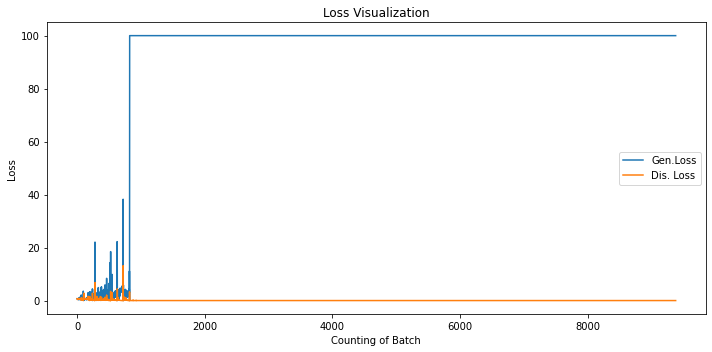

In [44]:
plt.figure(figsize = (10,5))
plt.title("Loss Approaches")
plt.plot(loss_history["gen"], label = 'Gen.Loss')
plt.plot(loss_history["dis"], label = 'Dis. Loss')
plt.xlabel("Counting of Batch")
plt.ylabel("Loss")
plt.title("Loss Visualization")
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()


In [45]:
model_generator.eval()

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): BatchNorm1d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): BatchNorm1d(512, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Linear(in_features=512, out_features=1024, bias=True)
    (9): BatchNorm1d(1024, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2)
    (11): Linear(in_features=1024, out_features=784, bias=True)
    (12): Tanh()
  )
)

In [46]:
with torch.no_grad():
    fixed_noise = torch.randn(16,100, device = device)
    Fakeimage = model_generator(fixed_noise).detach().cpu()

In [47]:
Fakeimage.shape

torch.Size([16, 1, 28, 28])

In [48]:
Fakeimage

tensor([[[[ 0.6709, -0.0214, -0.0630,  ...,  0.7423, -0.5227,  0.9045],
          [-0.7432,  0.1204, -0.3276,  ...,  0.9557, -0.2985,  0.8899],
          [ 0.8865,  0.8752,  0.7004,  ...,  0.7287,  0.5067,  0.7647],
          ...,
          [ 0.2177, -0.7725,  0.5908,  ...,  0.5791,  0.7361, -0.4868],
          [ 0.9520, -0.4247,  0.1614,  ...,  0.6631,  0.4577,  0.8031],
          [ 0.7253, -0.5797, -0.3401,  ...,  0.6929,  0.7604,  0.9419]]],


        [[[ 0.6709, -0.0214, -0.0630,  ...,  0.7423, -0.5227,  0.9045],
          [-0.7432,  0.1204, -0.3276,  ...,  0.9557, -0.2985,  0.8899],
          [ 0.8865,  0.8752,  0.7004,  ...,  0.7287,  0.5067,  0.7647],
          ...,
          [ 0.2177, -0.7725,  0.5908,  ...,  0.5791,  0.7361, -0.4868],
          [ 0.9520, -0.4247,  0.1614,  ...,  0.6631,  0.4577,  0.8031],
          [ 0.7253, -0.5797, -0.3401,  ...,  0.6929,  0.7604,  0.9419]]],


        [[[ 0.6709, -0.0214, -0.0630,  ...,  0.7423, -0.5227,  0.9045],
          [-0.7432,  0.120

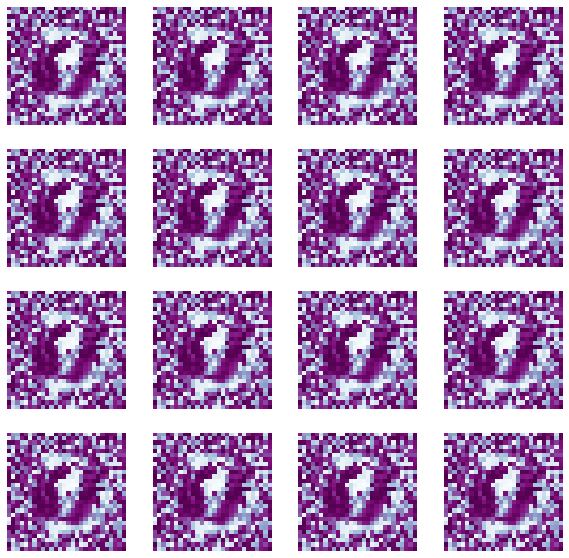

In [49]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(to_pil_image(0.5*Fakeimage[i]+0.5), cmap = "BuPu")
    plt.axis('off')

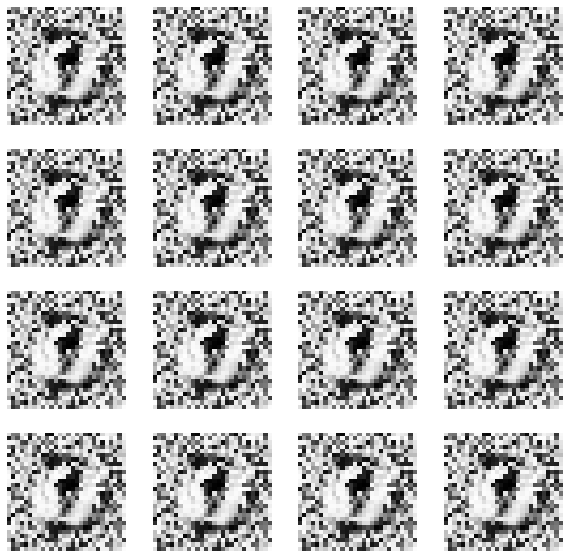

In [50]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(to_pil_image(0.5*Fakeimage[i]+0.5), cmap = "gray")
    plt.axis('off')

In [51]:
with torch.no_grad():
    fixed_noise = torch.randn(16, 1,28, 28, device = device)
    Fakeimage1 = model_discriminator(fixed_noise).detach().cpu()

In [52]:
Fakeimage1

tensor([[1.0006e-05],
        [8.5801e-11],
        [6.5705e-15],
        [9.8035e-11],
        [3.5291e-05],
        [2.2143e-10],
        [3.1153e-07],
        [5.3864e-13],
        [2.8624e-20],
        [4.6526e-08],
        [3.1981e-05],
        [5.3254e-23],
        [5.3972e-05],
        [9.6350e-16],
        [2.1087e-05],
        [2.6558e-04]])

In [53]:
Fakeimage1.shape

torch.Size([16, 1])